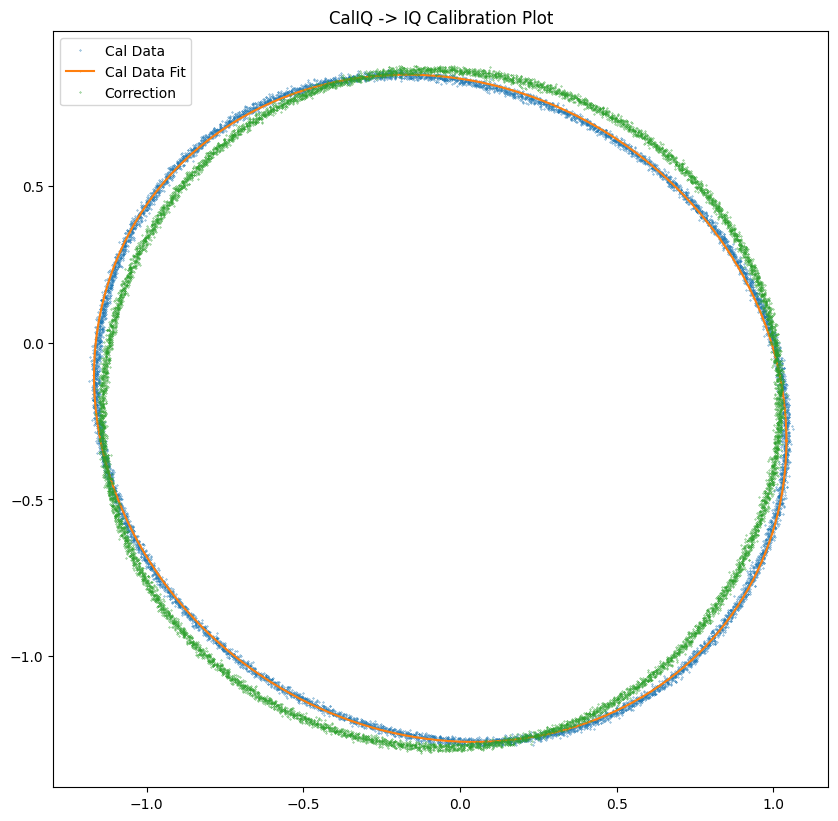

In [1]:

import numpy as np
import globvar
import os
from datetime import date


from datawrapper import LoadSpectraData, FindMixerCalibrationData, MixerCalibrationData, FindIQCalibrationData, IQCalibrationData
from utilities import CorrectionLog, Display, SumStringsToStringArray
from caliq import CalIQ
from backgroundcalibration import BackgroundCalibration

home = '/home/alessandro/Lab/Data/'

plot = 1
freq_num = 3
calibration_path = home + 'Calibration/'
mixer_calibrations_path = calibration_path + 'MixerCalibration/'
iq_calibrations_path = calibration_path + 'IQCalibration/'
log_path = home + '/Logs/Frequency_' + str(freq_num) + 'Output.log'

analysis_run = 1
globvar.logpath = home + 'log'

today = date.today()
logpath = globvar.logpath + '_run' + str(analysis_run) +'_' + str(today) + '.log'
# Useful while debugging the code, so we don't keep writing on the same log file in different trials
if os.path.isfile(logpath):
    os.remove(logpath)

# Array of data to be written on the log file
logdata = []

# Load spectra from channel data. Note that the output is an array of matrices, each containing data for 1 of the channels
spectra_data, numchannels, num_events, event_length = LoadSpectraData(freq_num)

logdata.append(numchannels)
logdata.append(num_events)
logdata.append(event_length)

#--------------------------------- Mixer Calibration ------------------------------------------

# Retrieve the ellipse folder nearest to the working frequency
mixer_calibration_folder = FindMixerCalibrationData(freq_num, mixer_calibrations_path)
mixer_calibration_data_path = mixer_calibrations_path + mixer_calibration_folder + '/'

logdata.append(mixer_calibration_data_path)

# Retrieve ellipse data from the folder we just found
# Note that 'MixerCalibrationData' returns the frequency window and the IQ matrix. The IQ matrix is the second of the objects returned.
_, mixer_calibration_data = MixerCalibrationData(mixer_calibration_data_path)

# Store the mixer correction, computed via IQCalibration function starting from the mixer_calibration_data
mixer = CalIQ(mixer_calibration_data, ifplot = plot)

logdata.extend([mixer.AI, mixer.AQ, mixer.I0, mixer.Q0, mixer.Amp])

# Save correction info on log file
CorrectionLog(logdata)
#--------------------------------- Mixer Calibration ------------------------------------------

Optimization terminated successfully.
         Current function value: 2278.484372
         Iterations: 130
         Function evaluations: 239


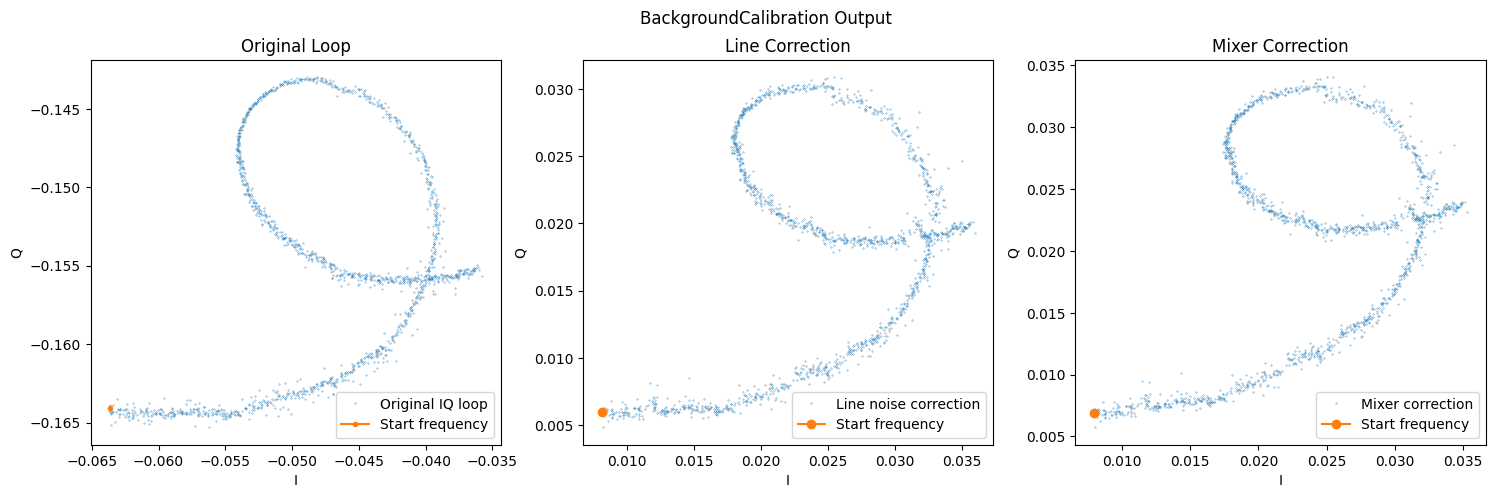

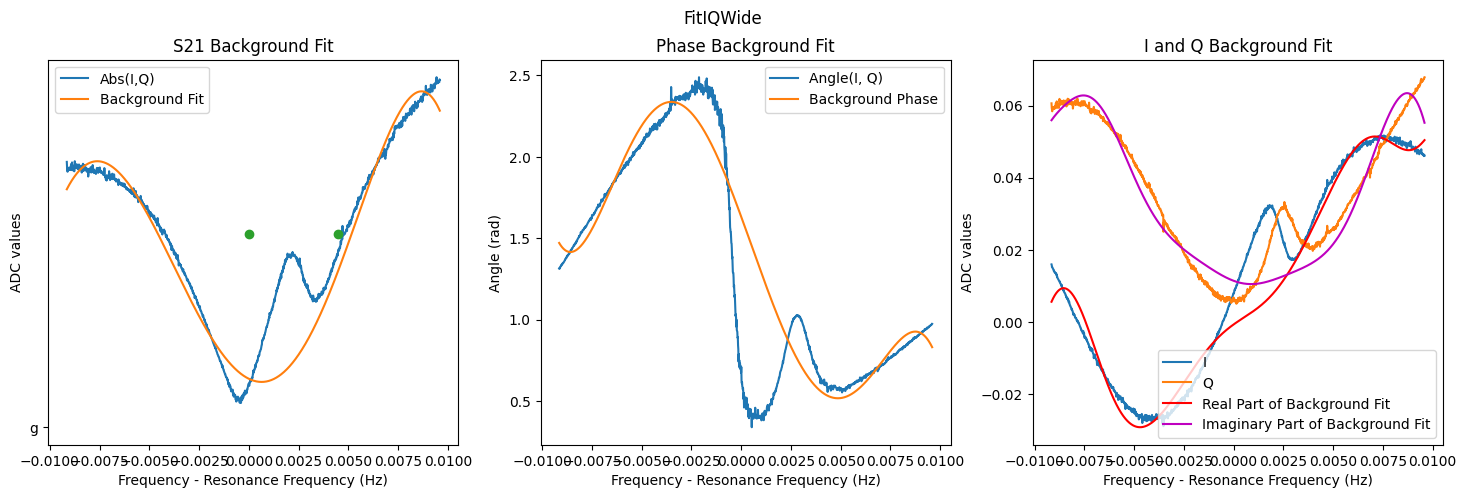

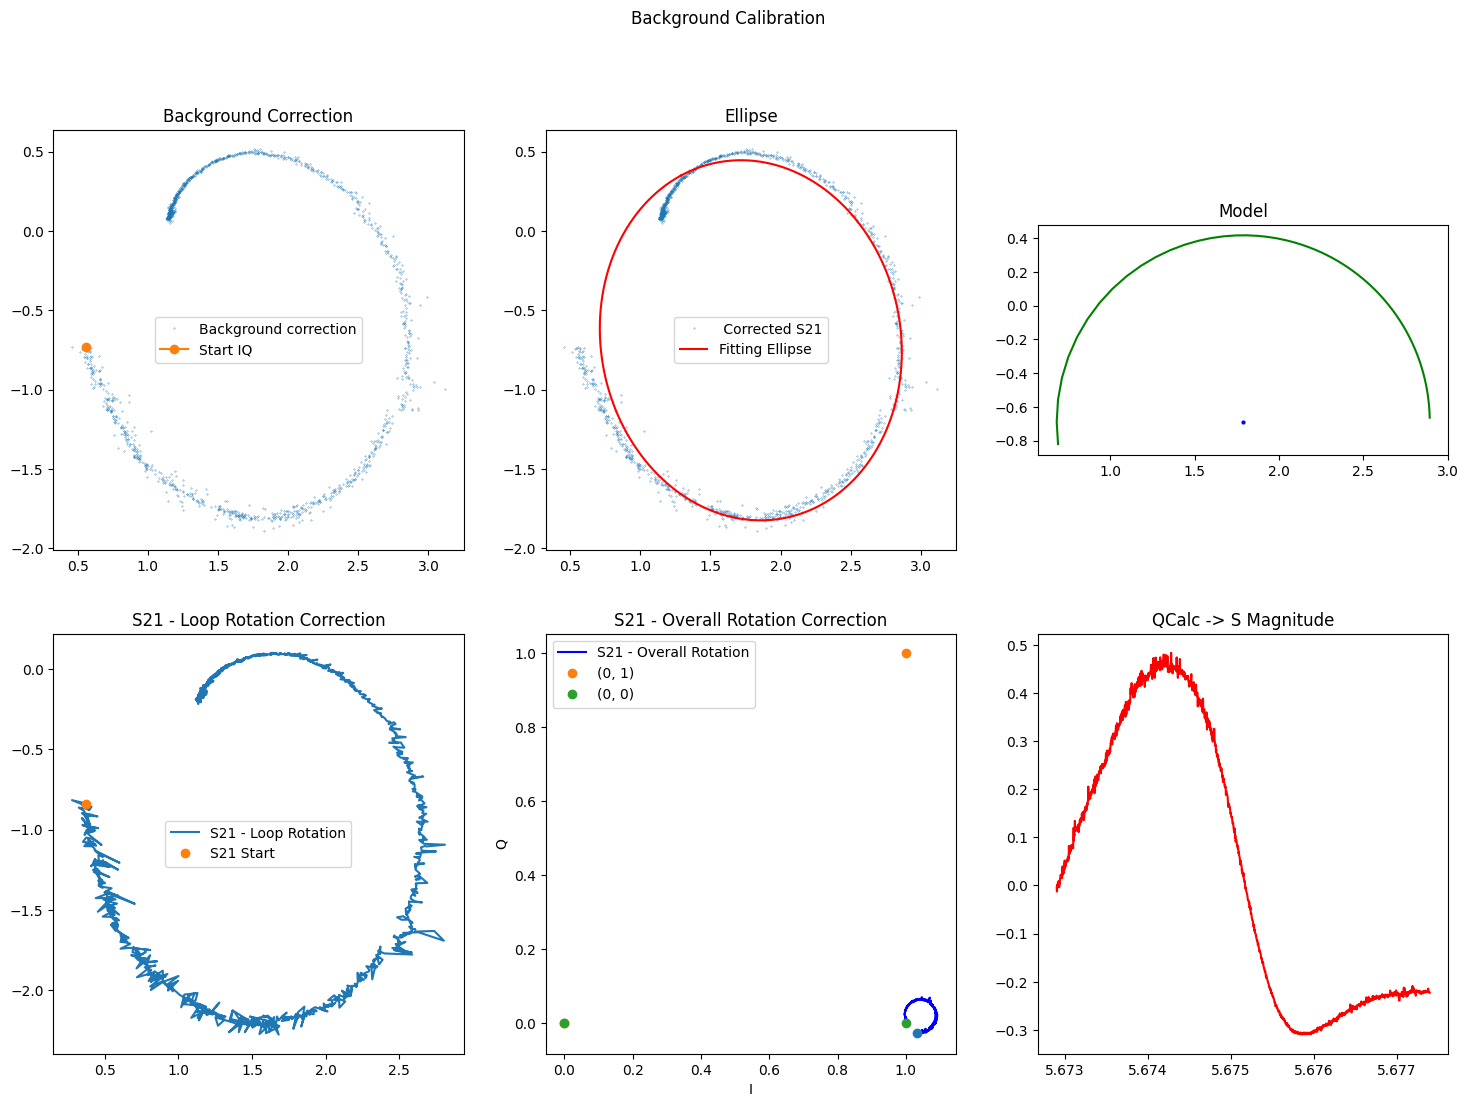

In [2]:
#--------------------------------- Background Calibration -------------------------------------

# We store the four different folders for IQ calibration in a variable
iq_calibration_folders = FindIQCalibrationData(freq_num, iq_calibrations_path)
iq_calibration_data_paths = SumStringsToStringArray(iq_calibrations_path, iq_calibration_folders, '/')

# Now 'iq_calibration_data_paths' contains all the iq calibration folders names.
# They are alphabetically ordered, and this will help us later on. We now correct for the IQ background

# We choose a run for the BackgroundCalibration data
background_calibration_run = 2
[background, outx, outy, f, qtot, f0, qi, qc] = BackgroundCalibration(iq_calibration_data_paths, mixer, rowmin = 0, rowmax = 2000, run = background_calibration_run, ifplot = plot)

#--------------------------------- Background Calibration -------------------------------------

In [3]:
np.absolute([7, -9, 5.5, -9.4])

array([7. , 9. , 5.5, 9.4])

In [4]:
np.angle([1 + 1j, 1 - 1j], deg = True)

array([ 45., -45.])